In [ ]:
wfrom google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
  import os
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import init_notebook_mode
import plotly.graph_objects as go
init_notebook_mode(connected=True)
pd.set_option('display.max_columns', 5000)
import warnings
warnings.filterwarnings("ignore")


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Final project CoderSchool - Nam Nguyen/2021_kaggle_ds_and_ml_survey_responses_only.csv')

#Exploring Data

In [ ]:
data = data.fillna(0)
data

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_Part_12,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,Q10_Part_8,Q10_Part_9,Q10_Part_10,Q10_Part_11,Q10_Part_12,Q10_Part_13,Q10_Part_14,Q10_Part_15,Q10_Part_16,Q10_OTHER,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_Part_4,Q12_Part_5,Q12_OTHER,Q13,Q14_Part_1,Q14_Part_2,Q14_Part_3,Q14_Part_4,Q14_Part_5,Q14_Part_6,Q14_Part_7,Q14_Part_8,Q14_Part_9,Q14_Part_10,Q14_Part_11,Q14_OTHER,Q15,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q16_Part_13,Q16_Part_14,Q16_Part_15,Q16_Part_16,Q16_Part_17,Q16_OTHER,Q17_Part_1,Q17_Part_2,Q17_Part_3,Q17_Part_4,Q17_Part_5,Q17_Part_6,Q17_Part_7,Q17_Part_8,Q17_Part_9,Q17_Part_10,Q17_Part_11,Q17_OTHER,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_OTHER,Q19_Part_1,Q19_Part_2,Q19_Part_3,Q19_Part_4,Q19_Part_5,Q19_OTHER,Q20,Q21,Q22,Q23,Q24_Part_1,Q24_Part_2,Q24_Part_3,Q24_Part_4,Q24_Part_5,Q24_Part_6,Q24_Part_7,Q24_OTHER,Q25,Q26,Q27_A_Part_1,Q27_A_Part_2,Q27_A_Part_3,Q27_A_Part_4,Q27_A_Part_5,Q27_A_Part_6,Q27_A_Part_7,Q27_A_Part_8,Q27_A_Part_9,Q27_A_Part_10,Q27_A_Part_11,Q27_A_OTHER,Q28,Q29_A_Part_1,Q29_A_Part_2,Q29_A_Part_3,Q29_A_Part_4,Q29_A_OTHER,Q30_A_Part_1,Q30_A_Part_2,Q30_A_Part_3,Q30_A_Part_4,Q30_A_Part_5,Q30_A_Part_6,Q30_A_Part_7,Q30_A_OTHER,Q31_A_Part_1,Q31_A_Part_2,Q31_A_Part_3,Q31_A_Part_4,Q31_A_Part_5,Q31_A_Part_6,Q31_A_Part_7,Q31_A_Part_8,Q31_A_Part_9,Q31_A_OTHER,Q32_A_Part_1,Q32_A_Part_2,Q32_A_Part_3,Q32_A_Part_4,Q32_A_Part_5,Q32_A_Part_6,Q32_A_Part_7,Q32_A_Part_8,Q32_A_Part_9,Q32_A_Part_10,Q32_A_Part_11,Q32_A_Part_12,Q32_A_Part_13,Q32_A_Part_14,Q32_A_Part_15,Q32_A_Part_16,Q32_A_Part_17,Q32_A_Part_18,Q32_A_Part_19,Q32_A_Part_20,Q32_A_OTHER,Q33,Q34_A_Part_1,Q34_A_Part_2,Q34_A_Part_3,Q34_A_Part_4,Q34_A_Part_5,Q34_A_Part_6,Q34_A_Part_7,Q34_A_Part_8,Q34_A_Part_9,Q34_A_Part_10,Q34_A_Part_11,Q34_A_Part_12,Q34_A_Part_13,Q34_A_Part_14,Q34_A_Part_15,Q34_A_Part_16,Q34_A_OTHER,Q35,Q36_A_Part_1,Q36_A_Part_2,Q36_A_Part_3,Q36_A_Part_4,Q36_A_Part_5,Q36_A_Part_6,Q36_A_Part_7,Q36_A_OTHER,Q37_A_Part_1,Q37_A_Part_2,Q37_A_Part_3,Q37_A_Part_4,Q37_A_Part_5,Q37_A_Part_6,Q37_A_Part_7,Q37_A_OTHER,Q38_A_Part_1,Q38_A_Part_2,Q38_A_Part_3,Q38_A_Part_4,Q38_A_Part_5,Q38_A_Part_6,Q38_A_Part_7,Q38_A_Part_8,Q38_A_Part_9,Q38_A_Part_10,Q38_A_Part_11,Q38_A_OTHER,Q39_Part_1,Q39_Part_2,Q39_Part_3,Q39_Part_4,Q39_Part_5,Q39_Part_6,Q39_Part_7,Q39_Part_8,Q39_Part_9,Q39_OTHER,Q40_Part_1,Q40_Part_2,Q40_Part_3,Q40_Part_4,Q40_Part_5,Q40_Part_6,Q40_Part_7,Q40_Part_8,Q40_Part_9,Q40_Part_10,Q40_Part_11,Q40_OTHER,Q41,Q42_Part_1,Q42_Part_2,Q42_Part_3,Q42_Part_4,Q42_Part_5,Q42_Part_6,Q42_Part_7,Q42_Part_8,Q42_Part_9,Q42_Part_10,Q42_Part_11,Q42_OTHER,Q27_B_Part_1,Q27_B_Part_2,Q27_B_Part_3,Q27_B_Part_4,Q27_B_Part_5,Q27_B_Part_6,Q27_B_Part_7,Q27_B_Part_8,Q27_B_Part_9,Q27_B_Part_10,Q27_B_Part_11,Q27_B_OTHER,Q29_B_Part_1,Q29_B_Part_2,Q29_B_Part_3,Q29_B_Part_4,Q29_B_OTHER,Q30_B_Part_1,Q30_B_Part_2,Q30_B_Part_3,Q30_B_Part_4,Q30_B_Part_5,Q30_B_Part_6,Q30_B_Part_7,Q30_B_OTHER,Q31_B_Part_1,Q31_B_Part_2,Q31_B_Part_3,Q31_B_Part_4,Q31_B_Part_5,Q31_B_Part_6,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_OTHER,Q32_B_Part_1,Q32_B_Part_2,Q32_B_Part_3,Q32_B_Part_4,Q32_B_Part_5,Q32_B_Part_6,Q32_B_Part_7,Q32_B_Part_8,Q32_B_Part_9,Q32_B_Part_10,Q32_B_Part_11,Q32_B_Part_12,Q32_B_Part_13,Q32_B_Part_14,Q32_B_Part_15,Q32_B_Part_16,Q32_B_Part_17,Q32_B_Part_18,Q32_B_Part_19,Q32_B_Part_20,Q32_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_Part_12,Q34_B_Part_13,Q34_B_Part_14,Q34_B_Part_15,Q34_B_Part_16,Q34_B_OTHER,Q36_B

#What factors determine the years of experience in coding?

In [ ]:
def fix(data):
  if data["Q4"] == "Bachelorâ\x80\x99s degree":
     return "Bachelor degree"
  if data["Q4"] == "Masterâ\x80\x99s degree":
     return "Master degree"
  if data["Q4"] == "Some college/university study without earning a Bachelor degree":
     return "Some college/university study without earning a Bachelor degree"
  else:
    return data["Q4"]
data["Q4"] =data.apply(fix,axis=1)
data

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_Part_12,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,Q10_Part_8,Q10_Part_9,Q10_Part_10,Q10_Part_11,Q10_Part_12,Q10_Part_13,Q10_Part_14,Q10_Part_15,Q10_Part_16,Q10_OTHER,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_Part_4,Q12_Part_5,Q12_OTHER,Q13,Q14_Part_1,Q14_Part_2,Q14_Part_3,Q14_Part_4,Q14_Part_5,Q14_Part_6,Q14_Part_7,Q14_Part_8,Q14_Part_9,Q14_Part_10,Q14_Part_11,Q14_OTHER,Q15,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q16_Part_13,Q16_Part_14,Q16_Part_15,Q16_Part_16,Q16_Part_17,Q16_OTHER,Q17_Part_1,Q17_Part_2,Q17_Part_3,Q17_Part_4,Q17_Part_5,Q17_Part_6,Q17_Part_7,Q17_Part_8,Q17_Part_9,Q17_Part_10,Q17_Part_11,Q17_OTHER,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_OTHER,Q19_Part_1,Q19_Part_2,Q19_Part_3,Q19_Part_4,Q19_Part_5,Q19_OTHER,Q20,Q21,Q22,Q23,Q24_Part_1,Q24_Part_2,Q24_Part_3,Q24_Part_4,Q24_Part_5,Q24_Part_6,Q24_Part_7,Q24_OTHER,Q25,Q26,Q27_A_Part_1,Q27_A_Part_2,Q27_A_Part_3,Q27_A_Part_4,Q27_A_Part_5,Q27_A_Part_6,Q27_A_Part_7,Q27_A_Part_8,Q27_A_Part_9,Q27_A_Part_10,Q27_A_Part_11,Q27_A_OTHER,Q28,Q29_A_Part_1,Q29_A_Part_2,Q29_A_Part_3,Q29_A_Part_4,Q29_A_OTHER,Q30_A_Part_1,Q30_A_Part_2,Q30_A_Part_3,Q30_A_Part_4,Q30_A_Part_5,Q30_A_Part_6,Q30_A_Part_7,Q30_A_OTHER,Q31_A_Part_1,Q31_A_Part_2,Q31_A_Part_3,Q31_A_Part_4,Q31_A_Part_5,Q31_A_Part_6,Q31_A_Part_7,Q31_A_Part_8,Q31_A_Part_9,Q31_A_OTHER,Q32_A_Part_1,Q32_A_Part_2,Q32_A_Part_3,Q32_A_Part_4,Q32_A_Part_5,Q32_A_Part_6,Q32_A_Part_7,Q32_A_Part_8,Q32_A_Part_9,Q32_A_Part_10,Q32_A_Part_11,Q32_A_Part_12,Q32_A_Part_13,Q32_A_Part_14,Q32_A_Part_15,Q32_A_Part_16,Q32_A_Part_17,Q32_A_Part_18,Q32_A_Part_19,Q32_A_Part_20,Q32_A_OTHER,Q33,Q34_A_Part_1,Q34_A_Part_2,Q34_A_Part_3,Q34_A_Part_4,Q34_A_Part_5,Q34_A_Part_6,Q34_A_Part_7,Q34_A_Part_8,Q34_A_Part_9,Q34_A_Part_10,Q34_A_Part_11,Q34_A_Part_12,Q34_A_Part_13,Q34_A_Part_14,Q34_A_Part_15,Q34_A_Part_16,Q34_A_OTHER,Q35,Q36_A_Part_1,Q36_A_Part_2,Q36_A_Part_3,Q36_A_Part_4,Q36_A_Part_5,Q36_A_Part_6,Q36_A_Part_7,Q36_A_OTHER,Q37_A_Part_1,Q37_A_Part_2,Q37_A_Part_3,Q37_A_Part_4,Q37_A_Part_5,Q37_A_Part_6,Q37_A_Part_7,Q37_A_OTHER,Q38_A_Part_1,Q38_A_Part_2,Q38_A_Part_3,Q38_A_Part_4,Q38_A_Part_5,Q38_A_Part_6,Q38_A_Part_7,Q38_A_Part_8,Q38_A_Part_9,Q38_A_Part_10,Q38_A_Part_11,Q38_A_OTHER,Q39_Part_1,Q39_Part_2,Q39_Part_3,Q39_Part_4,Q39_Part_5,Q39_Part_6,Q39_Part_7,Q39_Part_8,Q39_Part_9,Q39_OTHER,Q40_Part_1,Q40_Part_2,Q40_Part_3,Q40_Part_4,Q40_Part_5,Q40_Part_6,Q40_Part_7,Q40_Part_8,Q40_Part_9,Q40_Part_10,Q40_Part_11,Q40_OTHER,Q41,Q42_Part_1,Q42_Part_2,Q42_Part_3,Q42_Part_4,Q42_Part_5,Q42_Part_6,Q42_Part_7,Q42_Part_8,Q42_Part_9,Q42_Part_10,Q42_Part_11,Q42_OTHER,Q27_B_Part_1,Q27_B_Part_2,Q27_B_Part_3,Q27_B_Part_4,Q27_B_Part_5,Q27_B_Part_6,Q27_B_Part_7,Q27_B_Part_8,Q27_B_Part_9,Q27_B_Part_10,Q27_B_Part_11,Q27_B_OTHER,Q29_B_Part_1,Q29_B_Part_2,Q29_B_Part_3,Q29_B_Part_4,Q29_B_OTHER,Q30_B_Part_1,Q30_B_Part_2,Q30_B_Part_3,Q30_B_Part_4,Q30_B_Part_5,Q30_B_Part_6,Q30_B_Part_7,Q30_B_OTHER,Q31_B_Part_1,Q31_B_Part_2,Q31_B_Part_3,Q31_B_Part_4,Q31_B_Part_5,Q31_B_Part_6,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_OTHER,Q32_B_Part_1,Q32_B_Part_2,Q32_B_Part_3,Q32_B_Part_4,Q32_B_Part_5,Q32_B_Part_6,Q32_B_Part_7,Q32_B_Part_8,Q32_B_Part_9,Q32_B_Part_10,Q32_B_Part_11,Q32_B_Part_12,Q32_B_Part_13,Q32_B_Part_14,Q32_B_Part_15,Q32_B_Part_16,Q32_B_Part_17,Q32_B_Part_18,Q32_B_Part_19,Q32_B_Part_20,Q32_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_Part_12,Q34_B_Part_13,Q34_B_Part_14,Q34_B_Part_15,Q34_B_Part_16,Q34_B_OTHER,Q36_B

In [ ]:
part2 = data.iloc[:,0:7]
part2.drop(columns=['Time from Start to Finish (seconds)'], inplace= True)
part2.drop(index=[0], inplace=True)

##Gender vs Expertise

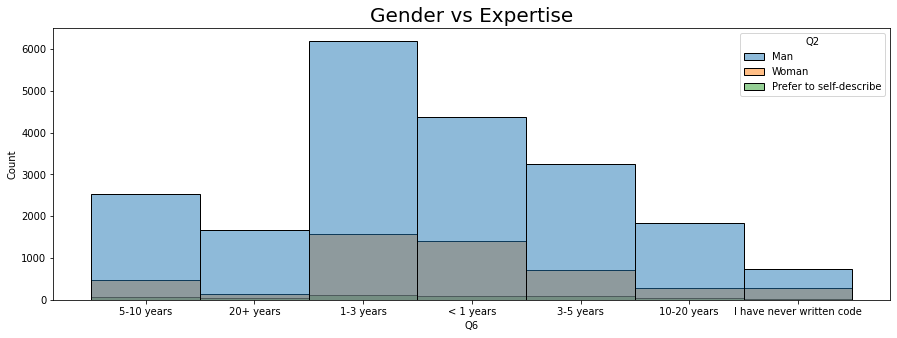

In [ ]:
plt.figure(figsize=(15,5))
sns.histplot(data= part2, x= 'Q6', hue = 'Q2', )
plt.title('Gender vs Expertise',fontsize=20)
plt.show()

Counting women in the profession

In [ ]:
bruh2 = part2[part2['Q2'] == "Woman"].groupby('Q6')['Q2'].count()
bruh2 = bruh2.reset_index()
bruh2 = bruh2.rename({'Q2': 'Woman'},axis = 'columns')
bruh2

,Q6,Woman
0,1-3 years,1565
1,10-20 years,276
2,20+ years,143
3,3-5 years,720
4,5-10 years,485
5,< 1 years,1418
6,I have never written code,283


Counting men in the profession

In [ ]:
bruh3 = part2[part2['Q2'] == "Man"].groupby('Q6')['Q2'].count()
bruh3 = bruh3.reset_index()
bruh3 = bruh3.rename({'Q2': 'Man'},axis = 'columns')
bruh3

,Q6,Man
0,1-3 years,6191
1,10-20 years,1843
2,20+ years,1665
3,3-5 years,3259
4,5-10 years,2542
5,< 1 years,4366
6,I have never written code,732


Joining tables

In [ ]:
part2 = part2.join(bruh2.set_index('Q6'),on ='Q6')
part2 = part2.join(bruh3.set_index('Q6'),on ='Q6')
part2

,Q1,Q2,Q3,Q4,Q5,Q6,Woman,Man
1,50-54,Man,India,Bachelor degree,Other,5-10 years,485,2542
2,50-54,Man,Other,Master degree,Program/Project Manager,20+ years,143,1665
3,22-24,Man,Pakistan,Master degree,Software Engineer,1-3 years,1565,6191
4,45-49,Man,Other,Doctoral degree,Research Scientist,20+ years,143,1665
5,45-49,Man,India,Doctoral degree,Other,< 1 years,1418,4366
...,...,...,...,...,...,...,...,...
25969,30-34,Man,Other,Bachelor degree,Data Analyst,1-3 years,1565,6191
25970,22-24,Man,Other,Master degree,Student,1-3 years,1565,6191
25971,50-54,Man,Other,Doctoral degree,Research Scientist,I have never written code,283,732
25972,45-49,Man,United States of America,Master degree,Data Scientist,5-10 years,485,2542


Determine ratio for both metrics

In [ ]:
part2['ratio between woman and man'] = part2["Woman"]/part2["Man"]
part2.drop(columns=['Woman'], inplace= True)
part2.drop(columns=['Man'], inplace= True)
part2 = part2.sort_values('ratio between woman and man',ascending=False)
part2

,Q1,Q2,Q3,Q4,Q5,Q6,ratio between woman and man
25973,18-21,Man,India,Bachelor degree,Business Analyst,I have never written code,0.386612
20514,40-44,Man,Other,Doctoral degree,Other,I have never written code,0.386612
10248,55-59,Man,India,Bachelor degree,Other,I have never written code,0.386612
20307,40-44,Man,Other,I prefer not to answer,Business Analyst,I have never written code,0.386612
20327,22-24,Man,Other,Bachelor degree,Data Engineer,I have never written code,0.386612
...,...,...,...,...,...,...,...
23515,55-59,Man,United States of America,Master degree,Program/Project Manager,20+ years,0.085886
11359,60-69,Woman,Other,Master degree,Other,20+ years,0.085886
8773,40-44,Man,United States of America,Doctoral degree,Research Scientist,20+ years,0.085886
11354,40-44,Man,India,Master degree,Data Scientist,20+ years,0.085886


In [ ]:
part2

,Q1,Q2,Q3,Q4,Q5,Q6,ratio between woman and man
25973,18-21,Man,India,Bachelor degree,Business Analyst,I have never written code,0.386612
20514,40-44,Man,Other,Doctoral degree,Other,I have never written code,0.386612
10248,55-59,Man,India,Bachelor degree,Other,I have never written code,0.386612
20307,40-44,Man,Other,I prefer not to answer,Business Analyst,I have never written code,0.386612
20327,22-24,Man,Other,Bachelor degree,Data Engineer,I have never written code,0.386612
...,...,...,...,...,...,...,...
23515,55-59,Man,United States of America,Master degree,Program/Project Manager,20+ years,0.085886
11359,60-69,Woman,Other,Master degree,Other,20+ years,0.085886
8773,40-44,Man,United States of America,Doctoral degree,Research Scientist,20+ years,0.085886
11354,40-44,Man,India,Master degree,Data Scientist,20+ years,0.085886



**Different metric**
```
# This is formatted as code
plt.figure(figsize=(20,5))
sns.histplot(data= part1, x= 'Level', hue = 'Q2')
plt.twinx()
sns.lineplot(data= part1, x= "Level", y = "ratio between woman and man")
plt.title('Gender vs Expertise')
plt.show()
```



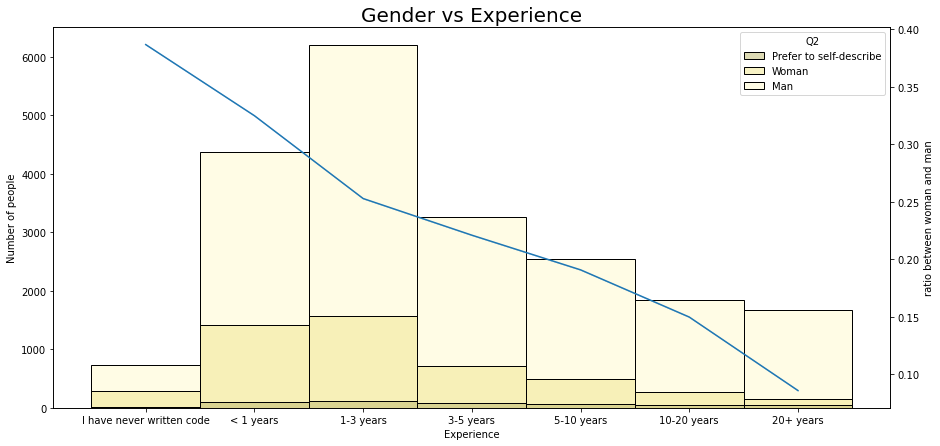

In [ ]:
Pallete = {'Man': 'lemonchiffon', 'Woman' : 'khaki', 'Prefer to self-describe': 'darkkhaki'}
fig, ax = plt.subplots(figsize=(15,7))
sns.histplot(data= part2, x= 'Q6', hue = 'Q2', palette = Pallete,hue_order = ['Prefer to self-describe','Woman','Man'])
plt.twinx()
sns.lineplot(data= part2, x= "Q6", y = "ratio between woman and man")
plt.title('Gender vs Experience',fontsize = 20)
ax.set_xlabel('Experience',fontsize= 10)
ax.set_ylabel('Number of people',fontsize= 10)
plt.show()

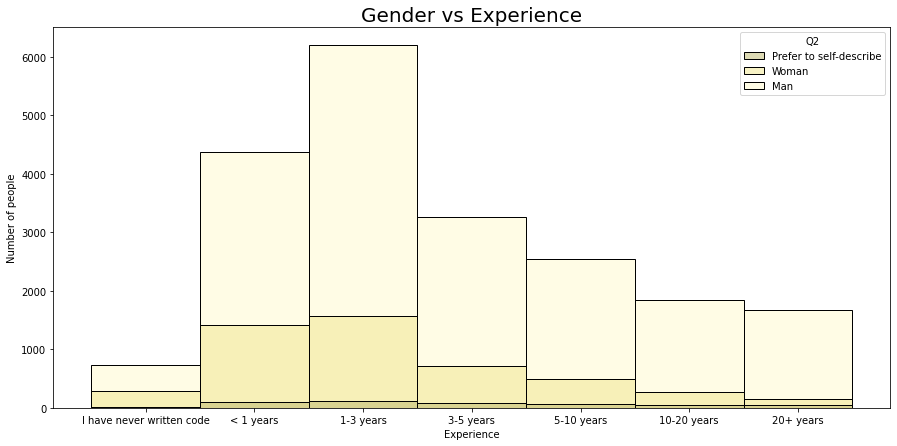

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
sns.histplot(data= part2, x= 'Q6', hue = 'Q2', palette = Pallete,hue_order = ['Prefer to self-describe','Woman','Man'])
plt.title('Gender vs Experience',fontsize = 20)
ax.set_xlabel('Experience',fontsize= 10)
ax.set_ylabel('Number of people',fontsize= 10)
plt.show()

#### **Speculation**


The bar graphs indicates that across all genders, there are lots of 1-3 years programmers while 20 years is lowest, implying that there are more people started learning coding nowadays. Apart from that, the downward line also indicates that ratio between women and men (Women/men) started to decrease as the year experience increases, implying that men has a dominance role in the field of coding and the more year of experience, the more obvious this effect is.

#### **Conclusion**

Despite the fact that programming have played an important role for many years, only recently people started to learn it. Besides that, we can also see that men tend to dominate in the the field of coding due to many reasons (perhaps bias, commitment, and women's role in technology before). Before, women did not have chance to learn coding, that's why at 20 years most coders are males not women.

## Location vs Expertise

In [ ]:
map = part2[['Q3','Q6']]
map

,Q3,Q6
25973,India,I have never written code
20514,Other,I have never written code
10248,India,I have never written code
20307,Other,I have never written code
20327,Other,I have never written code
...,...,...
23515,United States of America,20+ years
11359,Other,20+ years
8773,United States of America,20+ years
11354,India,20+ years


In [ ]:
map['Count'] = map.groupby('Q3').transform('count')
map['Count'] = map.groupby(['Q3','Q6']).transform('count')

In [ ]:
map

,Q3,Q6,Count
25973,India,I have never written code,283
20514,Other,I have never written code,442
10248,India,I have never written code,283
20307,Other,I have never written code,442
20327,Other,I have never written code,442
...,...,...,...
23515,United States of America,20+ years,457
11359,Other,20+ years,858
8773,United States of America,20+ years,457
11354,India,20+ years,103


In [ ]:
map['Q3'].unique()

array(['India', 'Other', 'United States of America', 'Brazil', 'France',
       'Pakistan', 'Japan',
       'United Kingdom of Great Britain and Northern Ireland', 'Nigeria',
       'Russia', 'Turkey'], dtype=object)

In [ ]:
import plotly.io as pio
pio.renderers.default = "colab"

In [ ]:
px.choropleth(map, locations = "Q3",
              color = "Count",
              locationmode = 'country names',
              hover_name = "Q3",
              animation_frame = 'Q6',
              title='Location vs Experience',
              color_continuous_scale = px.colors.sequential.matter)

#### **Speculation**


For USA, the color tend to darken as the year of experience increases, meaning there are more seniors developers than juniors or below. This is probably due to the early development of technology in America. For India, the color tend to lighten as the year of experience increases, meaning there are more juniors or below than seniors developers. This is probably because due to the recent introduction of free internet as well as late access to technology in India (This is not to imply most seniors are white, it can be american whose ethnicity is from India => in other words, this is strictly based on location). Other countries, however, doesn't change color as much and maintain below 500 counts across all level of experience. Perhaps this implies the jobs aren't so popular or the survey itself is not reliable to measure for other countries.

#### **Conclusion:**

Programming is dominant in USA for a long time while it is only recent for India.

## Age vs Expertise

In [ ]:
data['Q1'].unique()

array(['What is your age (# years)?', '50-54', '22-24', '45-49', '25-29',
       '18-21', '30-34', '40-44', '35-39', '70+', '55-59', '60-69'],
      dtype=object)

In [ ]:
age = data[['Q1','Q6']]
age.drop(index=[0], inplace=True)
age.sort_values('Q1', ascending=True, inplace = True)
age

,Q1,Q6
12987,18-21,< 1 years
11487,18-21,1-3 years
11485,18-21,1-3 years
11478,18-21,1-3 years
11473,18-21,3-5 years
...,...,...
12284,70+,10-20 years
22799,70+,1-3 years
14821,70+,3-5 years
7004,70+,20+ years


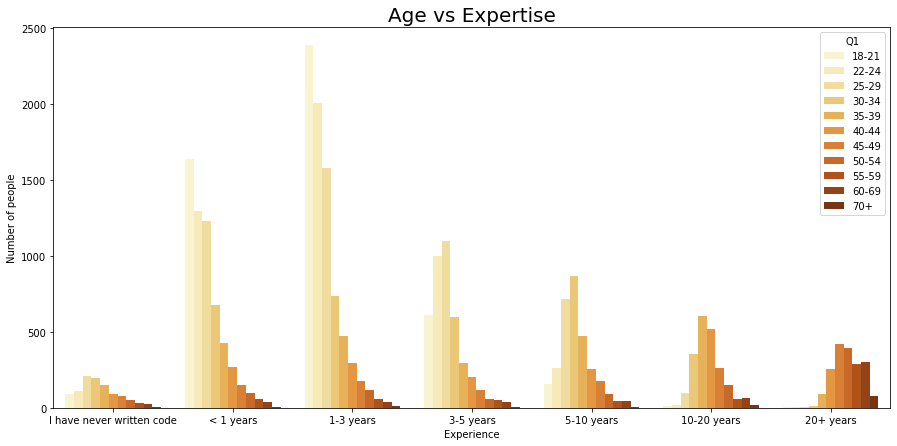

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
sns.countplot(data= age, x= 'Q6', hue = 'Q1',palette= 'YlOrBr', order = ['I have never written code', "< 1 years", "1-3 years", "3-5 years", '5-10 years', '10-20 years', '20+ years'])
plt.title('Age vs Expertise',fontsize=20)
ax.set_xlabel('Experience',fontsize= 10)
ax.set_ylabel('Number of people',fontsize= 10)
plt.show()

**There are also a lot of people from 25-29, who switch to programming.**

#### **Speculation**


In the chart above, there is an obvious indication that as a person is younger, they tend to have less experience in coding. This is intuitive because as you spend more years of coding, you become older. However, what is significant on this chart is that there is a fairly high amount of people around the age 25-29 that has coding experience from 1-5. This implies that people around this age probably might switch jobs to programming due to many reasons (it's recent yet applicable and more profitable in the modern world).


Another thing is that the "I have never written code" tells us that these people are aware  of programming but decided not to learn it or haven't learned it yet. We can see that this group of people who are aware ranged around the age of 18 to 29.

#### **Conclusion:**

Adults around the age 25-29 are looking for programming-related work due to his profitability and applicability. Besides those who coding, group of people who is aware of coding tends to be young adults.

## Jobs vs Expertise:

In [ ]:
part2

,Q1,Q2,Q3,Q4,Q5,Q6,ratio between woman and man
25973,18-21,Man,India,Bachelor degree,Business Analyst,I have never written code,0.386612
20514,40-44,Man,Other,Doctoral degree,Other,I have never written code,0.386612
10248,55-59,Man,India,Bachelor degree,Other,I have never written code,0.386612
20307,40-44,Man,Other,I prefer not to answer,Business Analyst,I have never written code,0.386612
20327,22-24,Man,Other,Bachelor degree,Data Engineer,I have never written code,0.386612
...,...,...,...,...,...,...,...
23515,55-59,Man,United States of America,Master degree,Program/Project Manager,20+ years,0.085886
11359,60-69,Woman,Other,Master degree,Other,20+ years,0.085886
8773,40-44,Man,United States of America,Doctoral degree,Research Scientist,20+ years,0.085886
11354,40-44,Man,India,Master degree,Data Scientist,20+ years,0.085886


In [ ]:
job = part2[['Q5','Q6']]
job

,Q5,Q6
25973,Business Analyst,I have never written code
20514,Other,I have never written code
10248,Other,I have never written code
20307,Business Analyst,I have never written code
20327,Data Engineer,I have never written code
...,...,...
23515,Program/Project Manager,20+ years
11359,Other,20+ years
8773,Research Scientist,20+ years
11354,Data Scientist,20+ years


In [ ]:
names = list(job['Q5'].unique())
names

['Business Analyst',
 'Other',
 'Data Engineer',
 'Data Scientist',
 'Product Manager',
 'Program/Project Manager',
 'Research Scientist',
 'Student',
 'Data Analyst',
 'Developer Relations/Advocacy',
 'Statistician',
 'Machine Learning Engineer',
 'Software Engineer',
 'Currently not employed',
 'DBA/Database Engineer']

In [ ]:
  job['Count'] = job.groupby('Q5').transform('count')
job['Count'] = job.groupby(['Q5','Q6']).transform('count')

In [ ]:
job[job['Q6'] == "20+ years"].sort_values('Count', ascending=False).head()

,Q5,Q6,Count
19300,Software Engineer,20+ years,368
16283,Software Engineer,20+ years,368
1298,Software Engineer,20+ years,368
11887,Software Engineer,20+ years,368
1807,Software Engineer,20+ years,368


In [ ]:
job['total'] = job.groupby('Q5')['Q6'].transform('count')
job['ratio'] = job['Count']/job['total']
job['Jobs'] = job['Q5']
job['Ratio of between years of experience within each job'] = job['ratio']

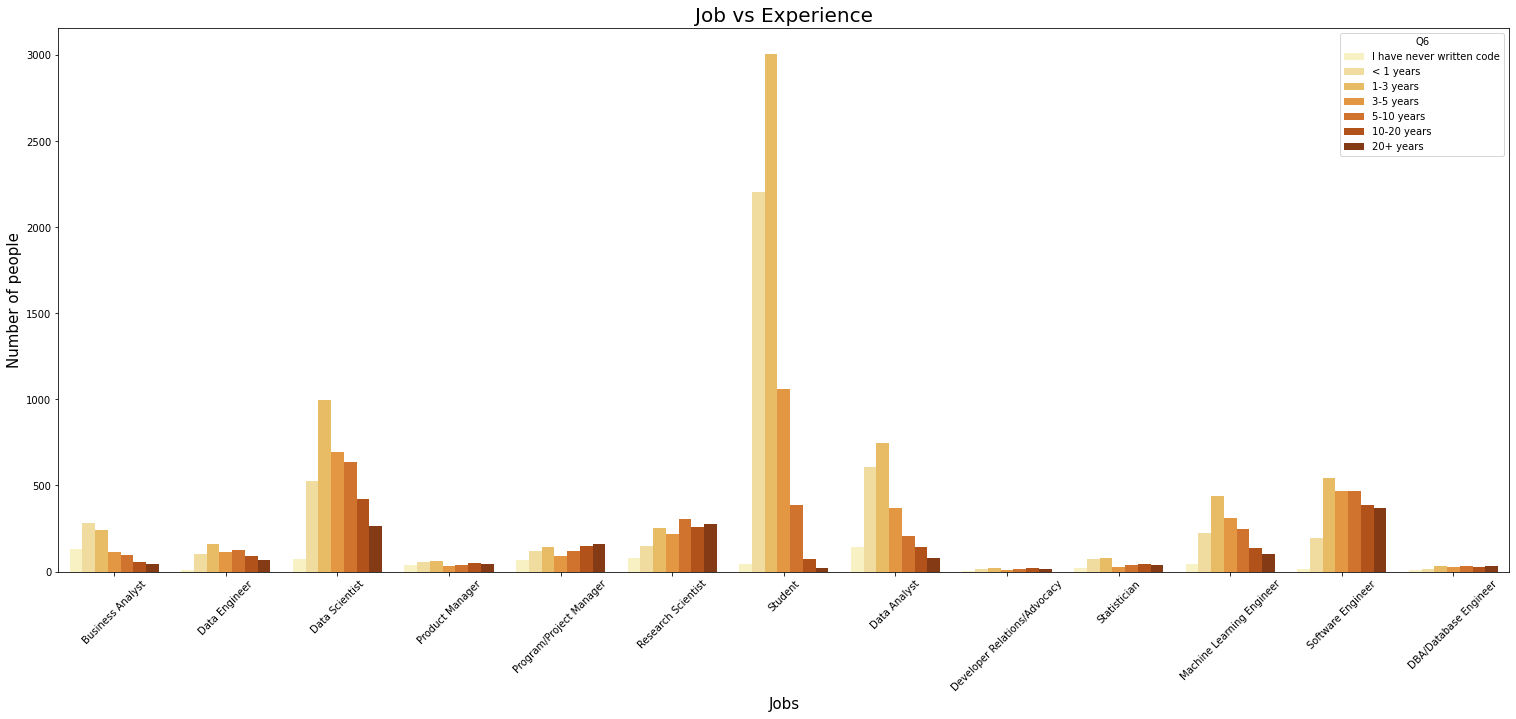

In [ ]:
fig, ax = plt.subplots(figsize=(26,10))

sns.countplot(data= job[~job['Jobs'].isin(['Other','Currently not employed'])], x= 'Jobs', hue = 'Q6',palette= 'YlOrBr')
plt.title('Job vs Experience',fontsize=20)
plt.xticks(rotation=45)
ax.set_xlabel('Jobs',fontsize= 15)
ax.set_ylabel('Number of people',fontsize= 15)
plt.show()

In [ ]:
cjob.sort_values('total', ascending=False).head()

#### **Speculation(q1)**


Through the chart above, there is one issue: the number of people of a particular who takes the survey is not equal. For example, database has barely any person that takes the survey, meaning margin of error for determining year of experience needed for a job will be very high. If not regarding the margin of error, we can find the ratio. Looking at the numbers above, we can also see that most seniors are from softward engineers and most programmers are from students.  

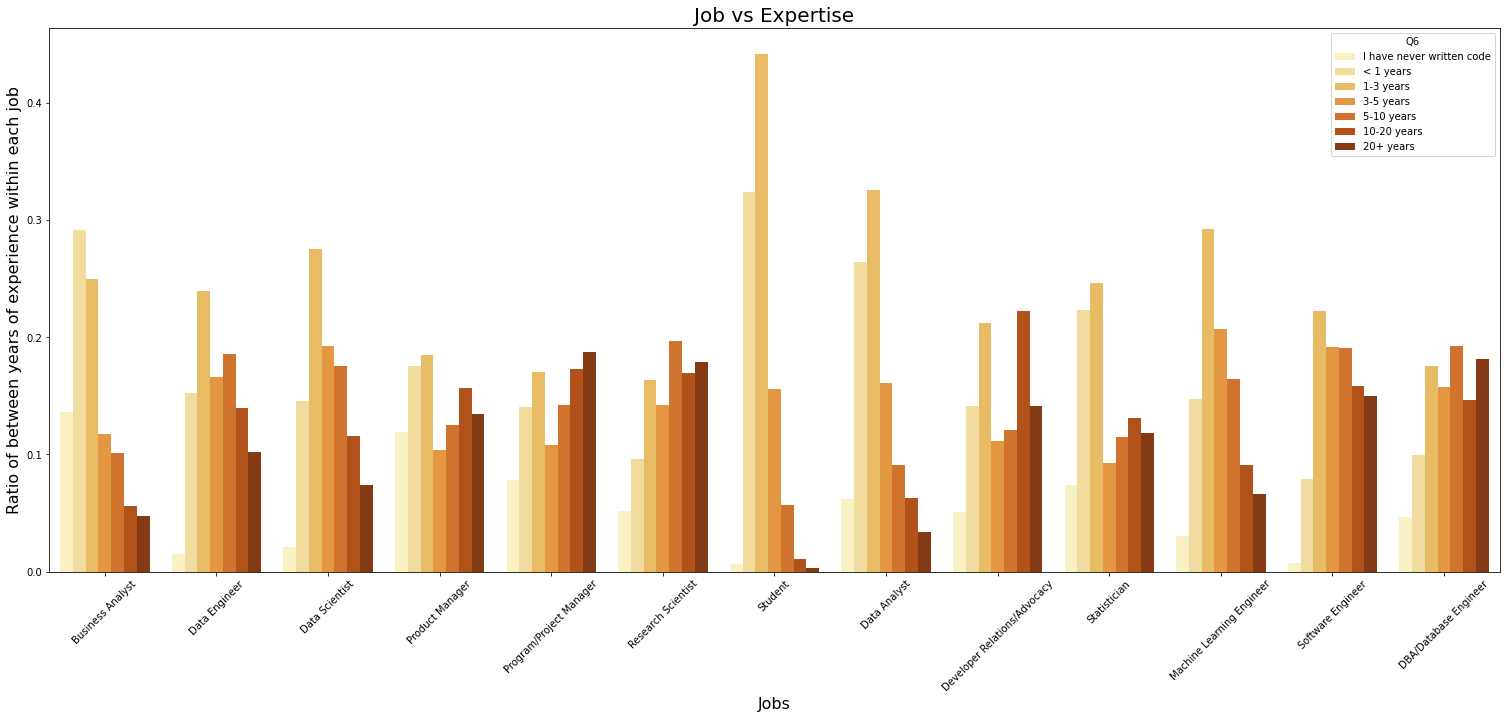

In [ ]:
fig, ax = plt.subplots(figsize=(26,10))
sns.barplot(data= job[~job['Jobs'].isin(['Other','Currently not employed'])], x= 'Jobs', y= 'Ratio of between years of experience within each job', hue = 'Q6',palette= 'YlOrBr')
plt.title('Job vs Expertise',fontsize=20)
plt.xticks(rotation=45)
ax.set_xlabel('Jobs',fontsize= 16)
ax.set_ylabel('Ratio of between years of experience within each job',fontsize= 16)
plt.show()

#### **Speculation(q2)**


Looking at this table, we can see lots of insights. However, we can look at the tendency of the charts for each job to tell whether or not a job requires coding or not. If it's a curve that start from low to high then it requires more. Any other exceptions, we can based on the highest ratio to tell. In jobs like DBA, research scientists and some others, they don't have that kind of curve but almost 20 percent of people there are senior developers so we can tell it requires extensive knowledge of coding. However, we can't assume the otherwise, meaning if the curve starts from high to low, it requires less knowledge. It is perhaps still new and thus, there are more inexperience coders.

#### **Conclusion:**

New and less coding-related jobs are hard to tell. However, we can definitely tell that in order to do well for jobs like DBA, research scientists, and software engineering, people need extensive knowledge

##What metrics do we use to determine expertise? (using Heatmap and Machine Learning)

**Converting texts to numerical values**

In [ ]:
data1 = data
data1.drop(index=[0], inplace=True)

In [ ]:
data1

In [ ]:
names = data1.columns
filtered_names = []
for i in names:
  if re.search("Q7_.",i):
    filtered_names.append(i)
print(filtered_names)

In [ ]:
df = data[filtered_names].apply(lambda r: [v for v in r.values if v], axis=1)
df

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

mlb.fit(df)

new_col_names = ["Q7_%s" % c for c in mlb.classes_]

# Create new DataFrame with transformed/one-hot encoded IDs
ids = pd.DataFrame(mlb.fit_transform(df), columns=new_col_names,index=df.index)

# Concat with original `Label` column
# pd.concat( [df[['Label']], ids], axis=1 )
ids.drop

In [ ]:
part3 = data1.iloc[:,0:7]
part3.drop(columns=['Time from Start to Finish (seconds)'], inplace= True)
part3

In [ ]:
def Q4toscore(data):
  if data["Q4"] == "Bachelor degree":
    return 3
  if data["Q4"] == "Master degree":
    return 4
  if data["Q4"] == "Some college/university study without earning a Bachelor degree":
    return 2
  if data["Q4"] == "No formal education past high school":
    return 1
  if data["Q4"] == "Professional doctorate":
    return 5
  if data["Q4"] == "I prefer not to answer":
    return 0
  if data["Q4"] == "Doctoral degree":
    return 5
part3["Q4"] =part3.apply(Q4toscore,axis=1)
part3

In [ ]:
def Q6toscore(data):
  if data["Q6"] == "I have never written code":
    return 1
  if data["Q6"] == "< 1 years":
    return 2
  if data["Q6"] == "1-3 years":
    return 3
  if data["Q6"] == "3-5 years":
    return 4
  if data["Q6"] == "5-10 years":
    return 5
  if data["Q6"] == "10-20 years":
    return 6
  if data["Q6"] == "20+ years":
    return 7

part3["Q6"] =part3.apply(Q6toscore,axis=1)
part3

In [ ]:
wholetable = pd.concat([part3,ids],axis=1)
wholetable

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(wholetable.corr())
plt.show()

**There is no correlation and thus, can't use machine learning**

## Language vs Expertise:

In [ ]:
df.rename('language',inplace= True)
df

In [ ]:
part2['Q6']

In [ ]:
language = pd.concat([part2["Q6"],df],axis=1)
language1 = language.explode('language')
language1

In [ ]:
language2 = language1.reset_index(drop=True).groupby(['Q6','language']).size()
language2

In [ ]:
language2 = pd.DataFrame(language2)
language2.reset_index(inplace=True)

In [ ]:
language2.columns=['Q6','language','count']
language2[language2['language']=='None']

In [ ]:
language2[language2['language']=='None']

In [ ]:
fig, ax = plt.subplots(figsize=(26,10))
sns.barplot(data=language2[~language2['language'].isin(['None','Other'])], x = "language", y = 'count', hue= 'Q6', palette= 'YlOrBr',hue_order = ['< 1 years','1-3 years','3-5 years','5-10 years','10-20 years','20+ years'])
plt.ylim(0,10000)
plt.title('Language vs Year of Experience',fontsize=20)
ax.set_xlabel('Languages',fontsize= 10)
ax.set_ylabel('Ratio of between years of experience within each job',fontsize= 14)
plt.show()

#### **Speculation of what language is most used and least used**


the most used language is Python obviously. Lots of Python users use python. On the other hand, most people don't use Swift and Julia. C and C++ has similar pattern

In [ ]:
language2['Total'] = language2.groupby('language')['count'].transform('sum')
language2["ratio"] = language2['count']/language2['Total']
language2

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(data=language2[~language2['language'].isin(['None','Other'])],palette= 'YlOrBr', x = "language", y = 'ratio', hue= 'Q6', hue_order = ['< 1 years','1-3 years','3-5 years','5-10 years','10-20 years','20+ years'])
plt.title('Ratio of Year of Experience vs Language',fontsize=20)
ax.set_xlabel('Language',fontsize= 10)
ax.set_ylabel('Ratio of years experience in each language',fontsize= 14)
plt.show()

#### **Speculation of which year of experience used what language**


Most experienced coders use swifts and Julia. Most beginners use Python, R, SQL, and Matlab.

In [ ]:
language

In [ ]:
language['Language Learned'] = language['language'].apply(lambda r: len(r))
language

In [ ]:
plt.figure(figsize=(30,10))
sns.countplot(data=language[language['Language Learned'] != 0],palette= 'YlOrBr', x = "Language Learned", hue = 'Q6', hue_order = ['< 1 years','1-3 years','3-5 years','5-10 years','10-20 years','20+ years'])
plt.title('Number of Language vs Year of Experience')
plt.show()

In [ ]:
language['Total'] = language.groupby('Q6')['Language Learned'].transform('count')
language['Total of language learned'] = language.groupby(['Q6','Language Learned'])['Language Learned'].transform('count')
language['Ratio'] = language['Total of language learned'] / language['Total']
language

In [ ]:
plt.figure(figsize=(30,10))
sns.barplot(data=language, y = "Ratio", x = 'Q6', hue = 'Language Learned', palette= 'YlOrBr', order = ['< 1 years','1-3 years','3-5 years','5-10 years','10-20 years','20+ years'])
plt.title('Ratio of number of Language vs Year of Experience')
plt.show()

In [ ]:
plt.figure(figsize=(30,10))
sns.barplot(data=language[language['Language Learned'] != 0], y = "Ratio", x = 'Language Learned', hue = 'Q6', hue_order = ['< 1 years','1-3 years','3-5 years','5-10 years','10-20 years','20+ years'])
plt.title('Ratio of number of Language vs Year of Experience')
plt.show()

In [ ]:
language


This is because the amount of 1-3 years is much greater compared to the rest of other categories so it's biased.
```
language['Total'] = language.groupby('Language Learned')['Q6'].transform('count')
language['Total of language learned'] = language.groupby(['Language Learned','Q6'])['Q6'].transform('count')
language['Ratio'] = language['Total of language learned'] / language['Total']
language
```

```
plt.figure(figsize=(30,10))
sns.barplot(data=language, y = "Ratio", x = 'Language Learned', hue = 'Q6', hue_order = ['< 1 years','1-3 years','3-5 years','5-10 years','10-20 years','20+ years'])
plt.title('Ratio of number of Language vs Year of Experience')
plt.show()
```



#### **Speculation of how many languages are learned based on years of experience**

more languages are learned as the year of experience increases